### Question 1

In [197]:
import numpy as np
from datetime import datetime
import pandas as pd

bikes = pd.read_csv('bike_sharing.csv')
num_row = bikes.shape[0]

In [198]:
np.random.seed(2021)
train = np.random.choice([True, False], num_row, replace = True, p = [0.5, 0.5])

As we will have several ways to organize our explanatory variables, to better compare these models, let's fix the instances for training and test sets.

In [199]:
y = bikes['registered'].values
y_train, y_test = y[train], y[~train]

The target variable is 'casual', we split the entire column into training and test sets, according to the True/False flags in the array 'train'.

In [200]:
selected_cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
x1 = bikes[selected_cols].values

Let's first construct a very simple regression model from numerical columns as listed above.<br/>
In order to compare the coefficients to identify important columns, it is necessary to scale all columns to interval [0, 1] using <i>MinMaxScaler</i>.<br/>
The three cells below listed three ways of doing min-max-scaling, please argue which way is correct.

In [201]:
'''
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x1 = min_max_scaler.fit_transform(x1)
x1_train, x1_test = x1[train,:], x1[~train,:]
'''

'\nfrom sklearn import preprocessing\nmin_max_scaler = preprocessing.MinMaxScaler()\nx1 = min_max_scaler.fit_transform(x1)\nx1_train, x1_test = x1[train,:], x1[~train,:]\n'

In [202]:
'''
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x1_train, x1_test = x1[train,:], x1[~train,:]
x1_train = min_max_scaler.fit_transform(x1_train)
x1_test = min_max_scaler.fit_transform(x1_test)
'''

'\nfrom sklearn import preprocessing\nmin_max_scaler = preprocessing.MinMaxScaler()\nx1_train, x1_test = x1[train,:], x1[~train,:]\nx1_train = min_max_scaler.fit_transform(x1_train)\nx1_test = min_max_scaler.fit_transform(x1_test)\n'

In [203]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x1_train, x1_test = x1[train,:], x1[~train,:]
x1_train = min_max_scaler.fit_transform(x1_train)
x1_test = min_max_scaler.transform(x1_test)

## Solution 1-2:
The correct way is cell ____________.

Third cell is right answer : 
split data and perform fit_tranform on test data and later perform  transform on train data. 

Justification : test data and training data should be independent and if we do normalization before splitting data then test data and training data will not be independent

In [204]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha = 1.0)
lasso.fit(x1_train, y_train)
print('alpha:', 1.0, '\t', lasso.score(x1_test, y_test))
print('R2 score:', lasso.score(x1_test, y_test))
for i in range(len(selected_cols)):
    print(selected_cols[i], '\t',i,lasso.coef_[i])

alpha: 1.0 	 0.3337561009257083
R2 score: 0.3337561009257083
season 	 0 48.552579241088914
yr 	 1 67.47645896552172
mnth 	 2 0.0
hr 	 3 143.8534458356691
holiday 	 4 -0.0
weekday 	 5 0.0
workingday 	 6 36.22018792716402
weathersit 	 7 -0.0
temp 	 8 141.3067102408608
atemp 	 9 0.0
hum 	 10 -110.50540041653332
windspeed 	 11 0.0


The $R^2$ score is 0.33, and there are already 5 columns used for this model (columns with non-zero coefficients).<br/>
Let's now decrease alpha to see if we can obtain a model with $R^2$ above 0.45.

In [205]:
for alpha in [1.0, 0.5, 0.2, 0.1]:
    lasso = linear_model.Lasso(alpha = alpha)
    lasso.fit(x1_train, y_train)
    print('alpha:', alpha)
    print('R2 score:', lasso.score(x1_test, y_test))
    for i in range(len(selected_cols)):
        print(selected_cols[i], '\t', lasso.coef_[i])

alpha: 1.0
R2 score: 0.3337561009257083
season 	 48.552579241088914
yr 	 67.47645896552172
mnth 	 0.0
hr 	 143.8534458356691
holiday 	 -0.0
weekday 	 0.0
workingday 	 36.22018792716402
weathersit 	 -0.0
temp 	 141.3067102408608
atemp 	 0.0
hum 	 -110.50540041653332
windspeed 	 0.0
alpha: 0.5
R2 score: 0.3372583709988252
season 	 51.43172734035656
yr 	 68.9565433348504
mnth 	 0.0
hr 	 146.2126971051315
holiday 	 -0.0
weekday 	 0.0
workingday 	 38.30510097122085
weathersit 	 -0.0
temp 	 115.682864388095
atemp 	 40.82193204642952
hum 	 -123.60515918120396
windspeed 	 0.0
alpha: 0.2
R2 score: 0.3397512252932096
season 	 53.327034965170434
yr 	 69.99539206397505
mnth 	 0.0
hr 	 147.44979401570717
holiday 	 -0.0
weekday 	 1.6155881949577173
workingday 	 39.59279584817247
weathersit 	 -4.393396287320516
temp 	 50.536611161421845
atemp 	 124.02925347036496
hum 	 -127.61529270633936
windspeed 	 11.643614632563553
alpha: 0.1
R2 score: 0.34049016925822095
season 	 53.32487940523828
yr 	 70.361858

Unfortunately, no.<br/>
Now let's consider the column 'weekday'. Although it is a numerical column, the numbers does not have a quantitative meaning, they are just indicators. Such columns are called **Nominal** columns, i.e., for each value x in the column 'weekday', we create a column called 'weekday=x', a record will get a value of 1 on this column if its orginal value is x, otherwise 0.<br/>
pandas conviniently provides a function 'get_dummies' for this purpose.<br/>
Both columns 'season' and 'weekday' are nominal columns.

In [206]:
seasons = pd.get_dummies(bikes['season'], prefix = 'season_=')
weekdays = pd.get_dummies(bikes['weekday'], prefix = 'weekday_=')

bikes = pd.concat([bikes, seasons, weekdays], axis = 1)

Another interesting column is column 'weathersit'. The description tells us these four situations are very different.
1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

First, Situation 1 is mutually exclusive from the rest. Second, there is a degree of severity associated from situation 2 to 4, meaning if situation 3 happens, the weather has gone passed situation 2. This is so-called **ordinal** columns.<br/>
For ordinal columns, we should turn on lower grade indicator automatically if the value is higher. For example, indicator for weathersit2 should be 1 all records with weathersit 2, 3, 4.<br/>
Third, there are very few records for weathersit = 4, that we do not need to create one column just for weathersit 4.

## Solution : 1-3 
Season    :  4 Variables ; Weekday : 7 Variables and  weathersit : 3 variables
Number of unique values in a columns determines number of dummy variables.

In [207]:
bikes['weathersit_=_1'] = 1 * (bikes['weathersit'] == 1)
bikes['weathersit_>=_2'] = 1 * (bikes['weathersit'] >= 2)
bikes['weathersit_>=_3'] = 1 * (bikes['weathersit'] >= 3)

In [208]:
selected_cols = ['yr', 'mnth', 'hr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'season_=_1', 'season_=_2', 'season_=_3', 'season_=_4', 'weekday_=_0', 'weekday_=_1', 'weekday_=_2', 'weekday_=_3', 'weekday_=_4', 'weekday_=_5', 'weekday_=_6', 'weathersit_=_1', 'weathersit_>=_2', 'weathersit_>=_3']
x2 = bikes[selected_cols].values

In [209]:
x2_train, x2_test = x2[train,:], x2[~train,:]
x2_train = min_max_scaler.fit_transform(x2_train)
x2_test = min_max_scaler.transform(x2_test)

In [210]:
lasso = linear_model.Lasso(alpha = 1.0)
lasso.fit(x2_train, y_train)
print('alpha:', 1.0)
print('R2 score:', lasso.score(x2_test, y_test))
for i in range(len(selected_cols)):
    print(selected_cols[i], '\t', lasso.coef_[i])

alpha: 1.0
R2 score: 0.33921775613761235
yr 	 67.24905214139518
mnth 	 0.0
hr 	 144.67172788492135
holiday 	 -0.0
workingday 	 36.18694776794533
temp 	 153.22080212218356
atemp 	 0.0
hum 	 -100.8975043131971
windspeed 	 0.0
season_=_1 	 -22.862338921225902
season_=_2 	 0.0
season_=_3 	 -0.0
season_=_4 	 29.9779373760094
weekday_=_0 	 -0.36491197541835685
weekday_=_1 	 -0.0
weekday_=_2 	 0.0
weekday_=_3 	 0.0
weekday_=_4 	 0.0
weekday_=_5 	 -0.0
weekday_=_6 	 0.0
weathersit_=_1 	 -0.0
weathersit_>=_2 	 0.0
weathersit_>=_3 	 -20.931624064162538


However, these indicator columns are not as significant as columns, 'yr', 'hr', 'workingday', 'temp' and 'hum'. Even with these five columns only, the performace is about the same.

In [211]:
selected_cols = ['yr', 'hr', 'workingday', 'temp', 'hum']
x3 = bikes[selected_cols].values
x3_train, x3_test = x3[train,:], x3[~train,:]
x3_train = min_max_scaler.fit_transform(x3_train)
x3_test = min_max_scaler.transform(x3_test)
lasso = linear_model.Lasso(alpha = 1.0)
lasso.fit(x3_train, y_train)
print('alpha:', 1.0)
print('R2 score:', lasso.score(x3_test, y_test))
for i in range(len(selected_cols)):
    print(selected_cols[i], '\t', lasso.coef_[i])

alpha: 1.0
R2 score: 0.3185266344678772
yr 	 67.08548284830512
hr 	 144.23724453828655
workingday 	 36.04793423065309
temp 	 169.99315633922674
hum 	 -94.82501332221992


Let's now think if there is a better way to use column 'dteday' since dates are not numerical values. We convert it to numerical values using data structure datetime with functions strptime and strftime.<br/>

## Solution 1-4 

In [259]:
#days = np.zeros((num_row))
#for i in range(num_row):
 #   days[i] = # using bikes.iloc[i]['dteday']
##code
num_row = len(bikes)
days = np.zeros(num_row)
for i in  range(num_row):
    date_format = "%Y-%m-%d"
    d = "01"
    m = "01"
    Current_date = datetime.strptime(bikes["dteday"].iloc[i],date_format)
    Current_date_year = Current_date.strftime("%Y")
    starting_Date = str(Current_date_year)+"-"+m+"-"+d
    starting_Date_year = datetime.strptime(starting_Date ,date_format)
    days[i] = abs(Current_date - starting_Date_year).days +1

bikes['days'] = days


selected_cols = ['days', 'yr', 'mnth', 'hr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed']
x4 = bikes[selected_cols].values
x4_train, x4_test = x4[train,:], x4[~train,:]
x4_train = min_max_scaler.fit_transform(x4_train)
x4_test = min_max_scaler.transform(x4_test)
lasso = linear_model.Lasso(alpha = 1.0)
lasso.fit(x4_train, y_train)
print('alpha:', 1.0)
print('R2 score:', lasso.score(x4_test, y_test))
for i in range(len(selected_cols)):
    print(selected_cols[i], '\t',i, lasso.coef_[i])

alpha: 1.0
R2 score: 0.3281515370153293
days 	 0 0.0
yr 	 1 67.17666255382841
mnth 	 2 41.371053791371956
hr 	 3 143.46922827639622
holiday 	 4 -0.0
workingday 	 5 36.7701643851936
atemp 	 6 179.11014616281398
hum 	 7 -110.09271340534262
windspeed 	 8 0.0


## Solution 1-5

In [213]:
peak_hour = pd.DataFrame(bikes)[['hr','cnt']].groupby("hr").sum().sort_values(["cnt"], ascending=False).index[0]
print ("peak hour {} ".format(peak_hour))

peak hour 17 


In [ ]:
hr_diff = np.zeros((num_row, 2))
for i in  range(len(days)):
    hr_diff[i, 0] = peak_hour - bikes["hr"].iloc[i]
    hr_diff[i, 1] = peak_hour - bikes["hr"].iloc[i]


bikes["hr_diff_x"] = hr_diff[:,0]
bikes["hr_diff_y"] = hr_diff[:,1]


#selected_cols = [ 'yr', 'mnth', 'hr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed','hr_diff_x','hr_diff_y']

month = pd.get_dummies(bikes['mnth'], prefix = 'mnth=')
bikes = pd.concat([bikes,month], axis = 1)
#selected_cols = ['yr','hum','holiday','workingday','hr_diff_x','temp']


In [267]:
#selected_cols = ['yr','hum','mnth=_1','mnth=_2','mnth=_3','mnth=_4','mnth=_5','mnth=_6','mnth=_7','mnth=_8','mnth=_9','mnth=_10','mnth=_11','mnth=_12','workingday','hr_diff_x','temp']
selected_cols = ['yr','hum','workingday','hr_diff_x','temp','season_=_2']
x5 = bikes[selected_cols].values
x5_train, x5_test = x5[train,:], x5[~train,:]
x5_train = min_max_scaler.fit_transform(x5_train)
x5_test = min_max_scaler.transform(x5_test)


"""from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter=7000 ,alpha = 0.0000000008, tol=1e-3,penalty="l2")
reg.fit(x5_train, y_train)
score = reg.score(x5_train, y_train)
print("R-squared  -  Test :", score)
print("R-squared  -  predict  :", reg.score(x5_test, y_test))"""

'''from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=2
polyreg=make_pipeline(PolynomialFeatures(degree),linear_model.Lasso(alpha = 0.1))
polyreg.fit(x5_train, y_train)
score = polyreg.score(x5_train, y_train)
print("R-squared:", score)
'''

'''
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
poly_x_inliers = poly_reg.fit_transform(x5_train)

regressor = LinearRegression()
regressor.fit(poly_x_inliers, y_train)
'''
''
"""reg1 = linear_model.Lasso(alpha = 1)
reg1.fit(x5_train, y_train)
print(" R-squared_Lesso Model - train:  {} ".format(reg1.score(x5_train, y_train)))
print(" R-squared_Lesso Model - test :  {} ".format(reg1.score(x5_test, y_test)))
print(pd.DataFrame(reg1.coef_))"""

import statsmodels.api as sm
model = sm.OLS(y_train,x5_train)
results = model.fit()
print(results.summary())

# build x5 as the cell above
# build a regression model with x5_train after normalization

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.645
Model:                            OLS   Adj. R-squared (uncentered):              0.645
Method:                 Least Squares   F-statistic:                              2630.
Date:                Wed, 16 Jun 2021   Prob (F-statistic):                        0.00
Time:                        23:45:00   Log-Likelihood:                         -54513.
No. Observations:                8687   AIC:                                  1.090e+05
Df Residuals:                    8681   BIC:                                  1.091e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [248]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
x_train3 = pca.fit_transform(bikes.drop(columns = {'dteday','instant'}))
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))
loading = pca.components_.T
df_loadings  = pd.DataFrame(loading,columns = ['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7'], index = bikes.drop(columns = {'dteday','instant'}).columns).abs().sum(axis=1)
print (df_loadings)


Variance of each component: [8.09713982e-01 1.56520258e-01 3.19145699e-02 1.73421337e-03
 5.99167864e-05 1.20872394e-05 7.36734144e-06]

 Total Variance Explained: 100.0
season             0.870376
yr                 0.109938
mnth               0.097808
hr                 0.609286
holiday            0.025316
weekday            1.000197
workingday         0.111973
weathersit         0.709053
temp               0.111738
atemp              0.101337
hum                0.113738
windspeed          0.020780
casual             0.973238
registered         1.190565
cnt                1.124979
season_=_1         0.393278
season_=_2         0.111147
season_=_3         0.215547
season_=_4         0.171389
weekday_=_0        0.155906
weekday_=_1        0.075948
weekday_=_2        0.072665
weekday_=_3        0.030821
weekday_=_4        0.066434
weekday_=_5        0.084940
weekday_=_6        0.147695
weathersit_=_1     0.509485
weathersit_>=_2    0.509485
weathersit_>=_3    0.199082
days              

### Question 2

In [4]:
import numpy as np
import pandas as pd
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import MinMaxScaler

bikes = pd.read_csv('bike_sharing.csv')
num_row = bikes.shape[0]
y = bikes['registered'].values
y = np.array([1 if i <= 60 else 2 if i <= 180 else 3 for i in y])

np.random.seed(2021)
selection = np.random.choice(['train', 'test', 'rest'], num_row, replace = True, p = [0.01, 0.09, 0.9])
y_train, y_test = y[selection == 'train'], y[selection == 'test']
bikes.shape

(17379, 17)

In [24]:
## dummy variables creation 

cols = ['temp', 'atemp', 'hum', 'windspeed']

yr = pd.get_dummies(bikes['yr'], prefix = 'yr=')
mnth = pd.get_dummies(bikes['mnth'], prefix = 'mnth=')
hr = pd.get_dummies(bikes['hr'], prefix = 'hr=')
holiday = pd.get_dummies(bikes['holiday'], prefix = 'holiday=')
workingday = pd.get_dummies(bikes['workingday'], prefix = 'workingday=')
df_ = pd.concat([yr,mnth,hr,holiday,workingday,bikes[cols]], axis = 1)
df_.shape

(17379, 46)

In [88]:
#selected_cols = ['yr', 'mnth', 'hr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed']
'''Split Data : Train - Test '''

x = df_.values
x_train, x_test = x[selection == 'train',:], x[selection == 'test',:]

## Data Scaling 
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)
print ("x_train shape {}, y_train shape : {}".format(x_train.shape,y_train.shape))
print ("x_test shape {}, y_test shape : {}".format(x_test.shape,y_test.shape))

x_train shape (171, 46), y_train shape : (171,)
x_test shape (1551, 46), y_test shape : (1551,)


In [79]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

num_C = 1

logit = [None] * num_C
inv_log_likelihood_train = [0.0] * num_C
inv_log_likelihood_test = [0.0] * num_C

R2_Test = []
R2_Train = []
inv_log_likelihood_train = []
inv_log_likelihood_test = []

for i in range(1,num_C+1):
    #logicReg = LogisticRegression(C=i,random_state=12,solver ='newton-cg', multi_class = 'multinomial')
    logicReg = LogisticRegression(C=i, random_state=12,solver ='newton-cg', multi_class = 'ovr')
    logicReg.fit(x_train, y_train)
    
    R2Train = logicReg.score(x_train, y_train)
    R2Test = logicReg.score(x_test, y_test)
    
    R2_Test.append(R2Test)
    R2_Train.append(R2Train)
    train_predict_probbility = logicReg.predict_proba(x_train)
    test_predict_probbility = logicReg.predict_proba(x_test)  
    
    log_loss_train = log_loss(y_train, train_predict_probbility,eps=1e-15, normalize=True, sample_weight=None, labels=None)
    log_loss_test = log_loss(y_test, test_predict_probbility,eps=1e-15, normalize=True, sample_weight=None, labels=None)
    
    inv_log_likelihood_train.append(log_loss_train)
    inv_log_likelihood_test.append(log_loss_test)
    
print ("\n At C : {} \n R2 Test : {:.4f} , R2-Train : {:.4f} , log_loss_train : {:.2f} , log_loss_test : {:.2f} ".format(i,R2Test,R2Train,log_loss_train,log_loss_test))
col = ["Predicted Class 1","Predicted Class 2","Predicted Class 3"]
print("\nConfusion Matrix : \n  {}".format(pd.DataFrame(confusion_matrix(y_test,logicReg.predict(x_test)), columns = col, index =col)))

print("\n Classification report:\n {}".format(classification_report(y_test,logicReg.predict(x_test))))


 At C : 1 
 R2 Test : 0.6718 , R2-Train : 0.8538 , log_loss_train : 0.59 , log_loss_test : 0.75 

Confusion Matrix : 
                     Predicted Class 1  Predicted Class 2  Predicted Class 3
Predicted Class 1                418                 80                 17
Predicted Class 2                116                249                147
Predicted Class 3                 21                128                375

 Classification report:
               precision    recall  f1-score   support

           1       0.75      0.81      0.78       515
           2       0.54      0.49      0.51       512
           3       0.70      0.72      0.71       524

    accuracy                           0.67      1551
   macro avg       0.66      0.67      0.67      1551
weighted avg       0.66      0.67      0.67      1551



At C : 1 ,R2 Test : 0.6809 ,R2-Train : 0.8596 ,inv_log_likelihood_train : 0.51 , inv_log_likelihood_test : 0.72 
At C : 2 ,R2 Test : 0.6828 ,R2-Train : 0.8655 ,inv_log_likelihood_train : 0.44 , inv_log_likelihood_test : 0.71 
At C : 3 ,R2 Test : 0.6841 ,R2-Train : 0.8713 ,inv_log_likelihood_train : 0.40 , inv_log_likelihood_test : 0.72 
At C : 4 ,R2 Test : 0.6841 ,R2-Train : 0.8713 ,inv_log_likelihood_train : 0.38 , inv_log_likelihood_test : 0.74 
At C : 5 ,R2 Test : 0.6821 ,R2-Train : 0.8655 ,inv_log_likelihood_train : 0.36 , inv_log_likelihood_test : 0.75 
At C : 6 ,R2 Test : 0.6796 ,R2-Train : 0.8713 ,inv_log_likelihood_train : 0.35 , inv_log_likelihood_test : 0.77 
At C : 7 ,R2 Test : 0.6809 ,R2-Train : 0.8713 ,inv_log_likelihood_train : 0.34 , inv_log_likelihood_test : 0.79 
At C : 8 ,R2 Test : 0.6815 ,R2-Train : 0.8713 ,inv_log_likelihood_train : 0.33 , inv_log_likelihood_test : 0.80 
At C : 9 ,R2 Test : 0.6809 ,R2-Train : 0.8713 ,inv_log_likelihood_train : 0.33 , inv_log_likelih

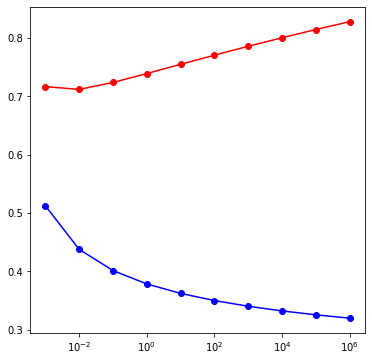

In [82]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

num_C = 10
C = [1.0] * num_C
for i in range(num_C):
    C[i] = pow(10, i-3)

logit = [None] * num_C
inv_log_likelihood_train = [0.0] * num_C
inv_log_likelihood_test = [0.0] * num_C

R2_Test = []
R2_Train = []
inv_log_likelihood_train = []
inv_log_likelihood_test = []

for i in range(1,num_C+1):
    logicReg = LogisticRegression(C=i,random_state=12,solver ='newton-cg', multi_class = 'multinomial')
    #logicReg = LogisticRegression(C=i, random_state=12,solver ='newton-cg', multi_class = 'ovr')
    logicReg.fit(x_train, y_train)
    
    R2Train = logicReg.score(x_train, y_train)
    R2Test = logicReg.score(x_test, y_test)
    
    R2_Test.append(R2Test)
    R2_Train.append(R2Train)
    train_predict_probbility = logicReg.predict_proba(x_train)
    test_predict_probbility = logicReg.predict_proba(x_test)  
    
    log_loss_train = log_loss(y_train, train_predict_probbility,eps=1e-15, normalize=True, sample_weight=None, labels=None)
    log_loss_test = log_loss(y_test, test_predict_probbility,eps=1e-15, normalize=True, sample_weight=None, labels=None)
    
    inv_log_likelihood_train.append(log_loss_train)
    inv_log_likelihood_test.append(log_loss_test)
    
    print ("At C : {} ,R2 Test : {:.4f} ,R2-Train : {:.4f} ,inv_log_likelihood_train : {:.2f} , inv_log_likelihood_test : {:.2f} ".format(i,R2Test,R2Train,log_loss_train,log_loss_test))

plt.figure(figsize = (6, 6))
plt.xscale('log')
plt.plot(C, inv_log_likelihood_train, 'bo-', C, inv_log_likelihood_test, 'ro-')
plt.show()

In [42]:
'''
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

classification_report(y_test,predict)
cm = confusion_matrix(y_test,predict)
predict = lr.predict(x_test)
## gives predict probability 
pd.DataFrame(lr.predict_proba(x_test))

## r 

print('R2 score train:', lr.score(x_train, y_train))
lr.fit(x_train, y_train)
print('R2 score test :', lr.score(x_test, y_test))

## Classification report 

print(classification_report(y_test,predict))
print(confusion_matrix(y_test,predict))

from sklearn.metrics import plot_confusion_matrix
clf = SVC(random_state=0)
plot_confusion_matrix(lr,x_test, y_test)  
plt.show()  
#pd.DataFrame(plot_confusion_matrix)
             
## predict prob
print("predic proba")
train_predict_probbility = lr.predict_proba(x_train)
test_predict_probbility = lr.predict_proba(y_train)
#print(lr.predict_proba(x_train))
## loss '''

NameError: name 'predict' is not defined

In [89]:
'''
1. Linear Function
2. Sigmoid function
3. cost function  ( Cross entropy)
4. gradient descent - Learning rate 

5 - https://realpython.com/logistic-regression-python/
'''

'\n1. Linear Function\n2. Sigmoid function\n3. cost function  ( Cross entropy)\n4. gradient descent - Learning rate \n\n5 - https://realpython.com/logistic-regression-python/\n'

In [ ]:
from sklearn.metrics import log_loss
print ("Log loss on train data :")
log_loss(y_train, train_predict_probbility,eps=1e-15, normalize=True, sample_weight=None, labels=None)
print ("Log loss on test data :")
log_loss(y_test, test_predict_probbility,eps=1e-15, normalize=True, sample_weight=None, labels=None)